In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Chargement des données

In [2]:
train_path = "../Data/twitter_training.csv"
val_path = "../Data/twitter_validation.csv"

df_train = pd.read_csv(train_path, header=None)
df_val = pd.read_csv(val_path, header=None)


In [3]:
#### Nommer les colonnes

columns = ["id", "entity", "sentiment", "text"]

df_train.columns = columns
df_val.columns = columns
df_train.head()


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
## Taille dataset
print("Train :", df_train.shape)
print("Validation :", df_val.shape)


Train : (74682, 4)
Validation : (1000, 4)


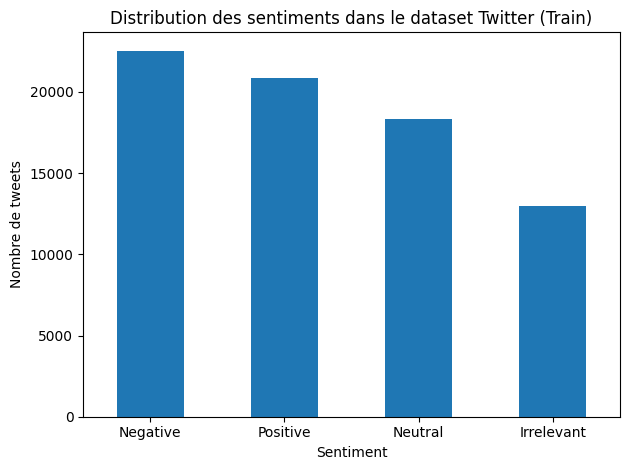

In [7]:


# Charger le dataset d'entraînement
df_train = pd.read_csv("../Data/twitter_training.csv", header=None)
df_train.columns = ["id", "entity", "sentiment", "text"]

# Calcul de la distribution
sentiment_counts = df_train["sentiment"].value_counts()

# Affichage du graphe
plt.figure()
sentiment_counts.plot(kind="bar")
plt.title("Distribution des sentiments dans le dataset Twitter (Train)")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### Nettoyage des tweets vides

In [8]:
# Supprimer les lignes sans texte
df_train = df_train.dropna(subset=["text"])
df_val = df_val.dropna(subset=["text"])

print("Train après nettoyage :", df_train.shape)
print("Validation après nettoyage :", df_val.shape)


Train après nettoyage : (73996, 4)
Validation après nettoyage : (1000, 4)


In [9]:
import re

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)      # URLs
    text = re.sub(r"@\w+", "", text)                # mentions
    text = re.sub(r"#\w+", "", text)                # hashtags
    text = re.sub(r"[^a-z\s]", "", text)            # caractères spéciaux
    text = re.sub(r"\s+", " ", text).strip()        # espaces multiples
    return text


In [10]:
df_train["clean_text"] = df_train["text"].apply(clean_tweet)
df_val["clean_text"] = df_val["text"].apply(clean_tweet)


In [11]:
df_train[["text", "clean_text"]].sample(5)


,text,clean_text
30202,I @Respawn Apex legends is freezing me on with...,i apex legends is freezing me on with the load...
74668,Nvidia really only delayed the 3070 2 flight w...,nvidia really only delayed the flight weeks
45287,Hey you<unk><unk> Why is our internet from 326...,hey youunkunk why is our internet from mbps do...
4507,yoo that's actually pretty freaky cool ngl,yoo thats actually pretty freaky cool ngl
31370,Watch my video!,watch my video


In [12]:
df_train = df_train[df_train["clean_text"] != ""]
df_val = df_val[df_val["clean_text"] != ""]

print("Train final :", df_train.shape)
print("Validation final :", df_val.shape)


Train final : (73624, 5)
Validation final : (1000, 5)


Après nettoyage, les tweets vides ou non exploitables ont été supprimés, ce qui a conduit à un jeu d’entraînement final de 73 624 tweets et un jeu de validation de 1 000 

Tu as maintenant 5 colonnes :
id
entity
sentiment
text
clean_text

### Transformer clean_text en vecteurs numériques

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
###   Création du vectoriseur

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english"
)


In [15]:
### Vectorisation 

X_train = tfidf.fit_transform(df_train["clean_text"])
X_val = tfidf.transform(df_val["clean_text"])

y_train = df_train["sentiment"]
y_val = df_val["sentiment"]


In [16]:
print(X_train.shape)
print(X_val.shape)


(73624, 5000)
(1000, 5000)


Les tweets ont été vectorisés à l’aide de la méthode TF-IDF afin de capturer l’importance relative des termes et bigrammes dans le corpus